# 1. Problem statement (scipy) :
We have the min and max temperatures in a city In India for each months of the year. We would like to find a function to describe this and show it graphically.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline 

In [4]:
# Forming the Data
max_temp = np.array([39, 41, 43, 47, 49, 51, 45, 38, 37, 29, 27, 25])
min_temp = np.array([21, 23, 27, 28, 32, 35, 31, 28, 21, 19, 17, 18])
months = np.arange(1,13)

Text(0, 0.5, 'Min and Max Temperatures')

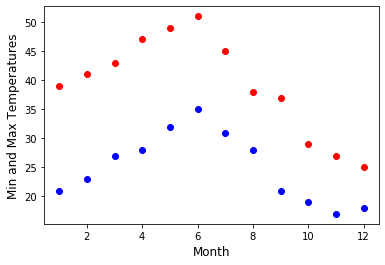

In [8]:
#Looking the nature of data
plt.plot(months,max_temp,'ro')
plt.plot(months,min_temp,'bo')
plt.xlabel('Month', fontsize = 12)
plt.ylabel('Min and Max Temperatures', fontsize = 12)

In [9]:
#Fitting the data to a periodic function using scipy

from scipy import optimize

def yearly_temp(times, avg , ampl , time_offset):
    return (avg + ampl * np.cos((times + time_offset) * 2 * np.pi / times.max()))

res_max, cov_max = optimize.curve_fit(yearly_temp, months,
                                      max_temp, [20, 10, 0])

res_min, cov_min = optimize.curve_fit(yearly_temp, months,
                                      min_temp, [-40, 20, 0])


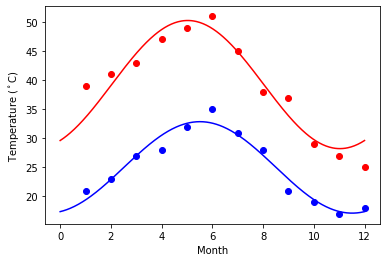

In [10]:
# Plotting the fitted data

days = np.linspace(0,12,num=365)
plt.figure()
plt.plot(months,max_temp,'ro')
plt.plot(days,yearly_temp(days, *res_max), 'r-')
plt.plot(months, min_temp, 'bo')
plt.plot(days, yearly_temp(days, *res_min), 'b-')
plt.xlabel('Month')
plt.ylabel('Temperature ($^\circ$C)')

plt.show()

# 2.Matplotlib :

In [11]:
url='https://raw.githubusercontent.com/Geoyi/Cleaning-Titanic-Data/master/titanic_original.csv'
titanic = pd.read_csv(url)
titanic.head()

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest
0,1.0,1.0,"Allen, Miss. Elisabeth Walton",female,29.0000,0.0,0.0,24160,211.3375,B5,S,2,NaN,"St Louis, MO"
1,1.0,1.0,"Allison, Master. Hudson Trevor",male,0.9167,1.0,2.0,113781,151.5500,C22 C26,S,11,NaN,"Montreal, PQ / Chesterville, ON"
2,1.0,0.0,"Allison, Miss. Helen Loraine",female,2.0000,1.0,2.0,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"
3,1.0,0.0,"Allison, Mr. Hudson Joshua Creighton",male,30.0000,1.0,2.0,113781,151.5500,C22 C26,S,NaN,135.0,"Montreal, PQ / Chesterville, ON"
4,1.0,0.0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25.0000,1.0,2.0,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"


In [42]:
# 1.Pei Chart
num = titanic['sex'].value_counts()
per = round((num/(num.sum()))*100, 2)
per

male      64.4
female    35.6
Name: sex, dtype: float64

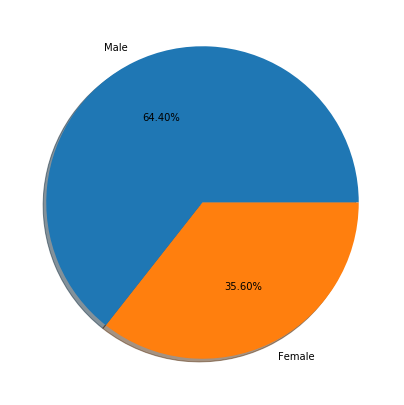

In [44]:
plt.figure(figsize = (7,8))
pie_chart = plt.pie(per, labels = ['Male', 'Female'], autopct = '%.2f%%', shadow = True)

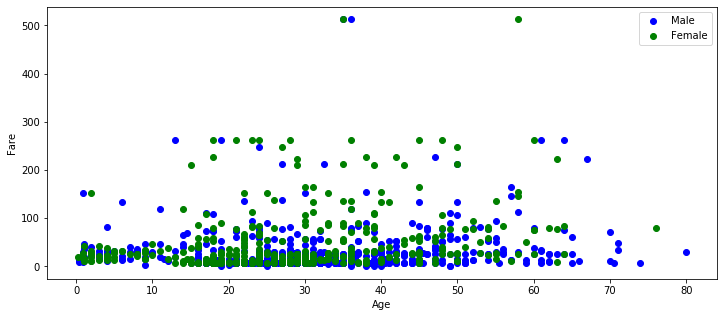

In [67]:
# 2.Create a scatterplot with the Fare paid and the Age, differ the plot color by gender
plt.figure(figsize = (12,5))
plt.plot(titanic[titanic['sex'] == 'male'].age, titanic[titanic['sex'] == 'male'].fare, 'bo', label = "Male")
plt.plot(titanic[titanic['sex'] == 'female'].age, titanic[titanic['sex'] == 'female'].fare, 'go', label = "Female")
plt.xlabel('Age')
plt.ylabel('Fare')
leg = plt.legend()